<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/TopicosAvanzadosComputacion2/blob/master/DL_L08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tópicos Avanzados de Computación II
## Dr. Carlos Villaseñor
## Lección 8 - Redes Neuronales convolucionales


Primeramente importamos unos paquetes

In [45]:
# Importamos numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Importamos lo necesario para crear la red
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

# Importamos unos paquetes de sklearn para comprobar el modelo
from sklearn.metrics import classification_report, confusion_matrix

Cargamos el dataset de MNIST

In [46]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

Mostrartemos un ejemplo de manera aleatoria

Text(0.5, 1.0, 'Label: 7')

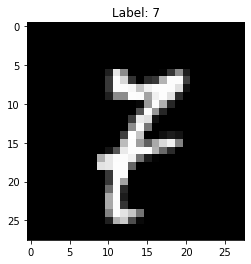

In [54]:
sample = np.random.randint(0,60000)
plt.imshow(xtrain[sample], cmap=plt.cm.gray)
plt.title('Label: ' + str(ytrain[sample]))

In [55]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

if backend.image_data_format() == 'channels_first':
    xtrain = xtrain.reshape(xtrain.shape[0], 1, 28, 28)
    xtest = xtest.reshape(xtest.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
    xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

print(xtrain.shape)
print(input_shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [56]:
ytrain = keras.utils.to_categorical(ytrain, 10)

In [57]:
def build_model():
  model = Sequential()

  model.add(Conv2D(32,kernel_size=(3,3),
                   activation='relu',
                   input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss = keras.losses.categorical_crossentropy,
                optimizer = 'adam',
                metrics=['accuracy'])
  return model

In [58]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)        

In [60]:
model.fit(xtrain, ytrain, batch_size=215, epochs=12, verbose=1,
          validation_split=0.17)

Train on 49800 samples, validate on 10200 samples
Epoch 1/12
49800/49800 [==============================] - 22s 451us/step - loss: 0.1915 - accuracy: 0.9446 - val_loss: 0.0784 - val_accuracy: 0.9759
Epoch 2/12
49800/49800 [==============================] - 22s 450us/step - loss: 0.1563 - accuracy: 0.9539 - val_loss: 0.0697 - val_accuracy: 0.9805
Epoch 3/12
49800/49800 [==============================] - 22s 450us/step - loss: 0.1322 - accuracy: 0.9614 - val_loss: 0.0632 - val_accuracy: 0.9814
Epoch 4/12
49800/49800 [==============================] - 23s 457us/step - loss: 0.1205 - accuracy: 0.9652 - val_loss: 0.0548 - val_accuracy: 0.9829
Epoch 5/12
49800/49800 [==============================] - 22s 446us/step - loss: 0.1080 - accuracy: 0.9679 - val_loss: 0.0558 - val_accuracy: 0.9839
Epoch 6/12
49800/49800 [==============================] - 22s 448us/step - loss: 0.1020 - accuracy: 0.9696 - val_loss: 0.0491 - val_accuracy: 0.9854
Epoch 7/12
49800/49800 [==============================] 

In [61]:
ypred=model.predict(xtest)
print('Salida de la red:\n', ypred[0])

ypred = np.argmax(ypred, axis=1)
print('Predicciones:\n', ypred)

print('Reporte de clasificación:\n', classification_report(ytest, ypred))
print('Matriz de confusión:\n', confusion_matrix(ytest, ypred))

Salida de la red:
 [1.4683944e-10 6.3708615e-07 1.7525837e-05 3.8782514e-07 1.0001444e-09
 3.6225301e-11 2.2320155e-14 9.9998116e-01 7.5642170e-10 3.2249611e-07]
Predicciones:
 [7 2 1 ... 4 5 6]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Matriz de confusión

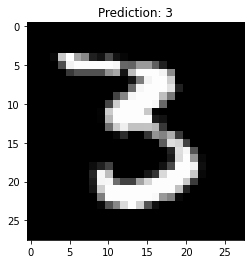

In [69]:

sample = np.random.randint(0,10000)
x = xtest[sample].reshape(28,28)
plt.imshow(x, cmap=plt.cm.gray)
plt.title('Prediction: ' + str(ypred[sample]))
plt.show()